In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('titanic.csv')
# df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

In [5]:
filter=df.drop(df[['Survived','Pclass','Sex', 'Age','Fare']],axis='columns')
filter

,PassengerId,Name,SibSp,Parch,Ticket,Cabin,Embarked
0,1,"Braund, Mr. Owen Harris",1,0,A/5 21171,NaN,S
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,C85,C
2,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,NaN,S
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,C123,S
4,5,"Allen, Mr. William Henry",0,0,373450,NaN,S
...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",0,0,211536,NaN,S
887,888,"Graham, Miss. Margaret Edith",0,0,112053,B42,S
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,NaN,S
889,890,"Behr, Mr. Karl Howell",0,0,111369,C148,C


In [7]:
data=df[['Survived','Pclass','Sex', 'Age','Fare']]
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [ ]:
data.isnull().sum()

In [9]:
# filling the null values in the age columns 
mean = data['Age'].mean()
data.loc[:, 'Age'] = data['Age'].fillna(mean)

In [ ]:
data.isnull().sum()

In [26]:
# perform encoding in the sex column
# df.Sex.nunique()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.loc[:,'Sex']=le.fit_transform(data.loc[:,'Sex'])
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [32]:
# separate my data to train and test
from sklearn.model_selection import train_test_split
x=data[['Pclass', 'Sex', 'Age', 'Fare']]
y=data.Survived
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)
len(x_train)

712

In [34]:
len(x_test)

179

In [39]:
# create a model
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
my_prediction=[{'Pclass':3,'Sex':1,'Age':22, 'Fare':7.2500}]
prediction=pd.DataFrame(my_prediction)
model.predict(prediction)

array([0], dtype=int64)

In [50]:
model.predict(x_test)

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [66]:
model.score(x_test,y_test)

0.7486033519553073

In [74]:
# check where the model has failed 
ypredicted=model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ypredicted)
cm

array([[79, 18],
       [27, 55]], dtype=int64)

Text(0.5, 25.722222222222214, 'predicted')

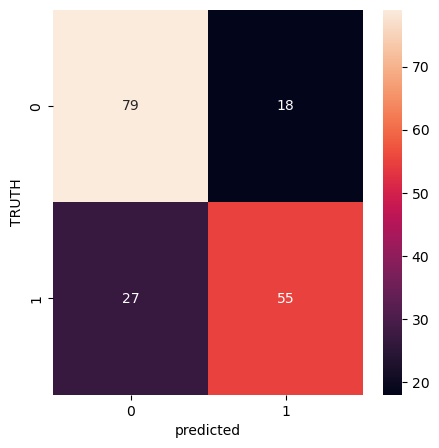

In [84]:
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(cm,annot=True)
plt.ylabel('TRUTH')
plt.xlabel('predicted')
# plt.show()